# Numerical solution to the 1-dimensional Time Independent Schroedinger Equation
Based on the paper "Matrix Numerov method for solving Schroedinger's equation" by Mohandas Pillai, Joshua Goglio, and Thad G. Walker, _American Journal of Physics_ **80** (11), 1017 (2012).  [doi:10.1119/1.4748813](http://dx.doi.org/10.1119/1.4748813)


In [1]:
# import some needed libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
%matplotlib inline

In [2]:
autoscale = False # set this equal to true to use Pillai's recommended step sizes

In [3]:
# values of constants
hbar = 1.0
mass = 1.0 # changing the mass will also change the energy scale
omega = 1.0


In [4]:
# bounds (These are overwritten if autoscale=True)
xmin = -5.0 # lower bound of position
xmax = 5.0 # upper bound of position
n = 100 # number of steps (may be overwritten if autoscale == True)
dx = (xmax-xmin)/(n-1)

In [5]:
# the function V is the potential energy function
def V(x):
    # make sure there is no division by zero
    # this also needs to be a "vectorizable" function
    # uncomment one of the examples below, or write your own.
    return 0.5*mass*omega**2*x*x # harmonic oscillator
    

In [6]:
if (autoscale): 
    #Emax is the maximum energy for which to check for eigenvalues
    Emax = 20.0
    #The next lines make some reasonable choices for the position grid size and spacing
    xt = opt.brentq(lambda x: V(x)-Emax ,0,5*Emax) #classical turning point
    dx = 1.0/np.sqrt(2*Emax) #step size
    # bounds and number of steps
    n = np.int(0.5+2*(xt/dx + 4.0*np.pi)) #number of steps
    xmin = -dx*(n+1)/2 
    xmax = dx*(n+1)/2

In [7]:
xmin, xmax, n #show the limits and number of steps

(-5.0, 5.0, 100)

In [8]:
#define the x coordinates
x = np.linspace(xmin,xmax,n)

In [9]:
#define the numerov matrices
B = np.matrix((np.eye(n,k=-1)+10.0*np.eye(n,k=0)+np.eye(n,k=1))/12.0)
A = np.matrix((np.eye(n,k=-1)-2.0*np.eye(n,k=0)+np.eye(n,k=1))/(dx**2))

In [10]:
#calculate kinetic energy operator using Numerov's approximation
KE = -0.5*hbar**2/mass*B.I*A

In [11]:
#calculate hamiltonian operator approximation
H = KE + np.diag(V(x))

In [14]:
#Calculate eigenvalues and eigenvectors of H
energies, wavefunctions = np.linalg.eigh(H) # "wavefunctions" is a matrix with one eigenvector in each column.

In [15]:
energies #display the lowest four energies

array([  0.49999959,   1.49999715,   2.49998984,   3.49997482,
         4.49995293,   5.49995153,   6.50014214,   7.50129661,
         8.50607825,   9.52150074,  10.56141767,  11.64604745,
        12.79708967,  14.03179647,  15.36046274,  16.78765495,
        18.31462584,  19.94114087,  21.66644546,  23.48967816,
        25.41001613,  27.42670997,  29.53907833,  31.74649046,
        34.04834693,  36.44406207,  38.93304868,  41.51470496,
        44.18840319,  46.95347979,  49.80922647,  52.75488201,
        55.7896247 ,  58.91256508,  62.12273897,  65.41910068,
        68.80051628,  72.26575701,  75.81349263,  79.44228487,
        83.15058079,  86.93670626,  90.79885933,  94.73510369,
        98.74336215, 102.8214102 , 106.96686956, 111.17720203,
       115.4497033 , 119.78149707, 124.16952936, 128.61056316,
       133.10117332, 137.63774192, 142.21645406, 146.83329415,
       151.48404277, 156.16427421, 160.86935467, 165.59444129,
       170.33448199, 175.08421624, 179.83817686, 184.59

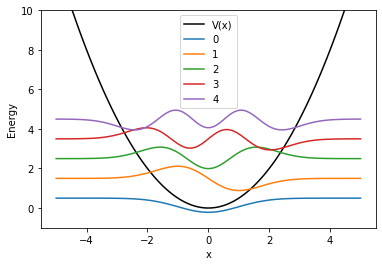

In [16]:
number = [0,1,2,3,4] #which wavefunctions to plot, starting counting from zero
zoom = -3.0 # zoom factor for wavefunctions to make them more visible
plt.plot(x,V(x),'-k',label="V(x)") # plot the potential
for num in number:
    plt.plot(x,zoom*wavefunctions[:,num]+energies[num],label=num) #plot the num-th wavefunction
plt.ylim(-1,10); # set limits of vertical axis for plot
plt.legend();
plt.xlabel("x");
plt.ylabel("Energy");